# Penguin EDA

## Author: Breno Menezes

## Data: Palmer Archipealago:https://www.kaggle.com/parulpandey/palmer-archipelago-antarctica-penguin-data

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
#Loading the dataset
penguins_size = pd.read_csv('data/penguins_size.csv', sep = ",")
penguins_size.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [2]:
penguins_size.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [3]:
penguins_size.dtypes

species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

### Cleaning

In [4]:
penguins_size.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [8]:
penguins_size.value_counts(["sex"])

sex   
MALE      177
FEMALE    165
dtype: int64

In [6]:
penguins_size['sex'] = penguins_size['sex'].fillna('MALE')

In [7]:
#penguins_size.drop(axis = 0, inplace = True, index = 336)
penguins_size.replace(".", "MALE", inplace=True)
penguins_size.dropna(inplace=True)
penguins_size.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [9]:
duplicated = penguins_size.duplicated()
print(duplicated.sum())

0


## Statistical Highlights

In [10]:
penguins_size.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [11]:
penguins_size['species'].value_counts()

Adelie       151
Gentoo       123
Chinstrap     68
Name: species, dtype: int64

In [12]:
# Find body mass mean for each species.
mean_bodymass = penguins_size.groupby('species')['body_mass_g'].mean()
mean_bodymass

species
Adelie       3700.662252
Chinstrap    3733.088235
Gentoo       5076.016260
Name: body_mass_g, dtype: float64

## Data Visualization

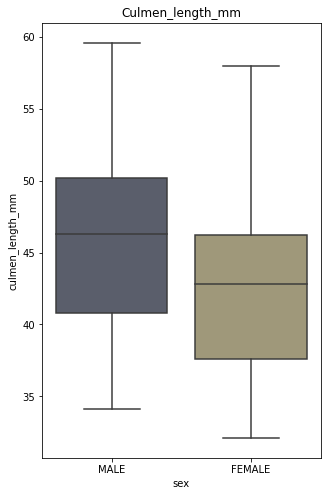

In [13]:
#Relationship of the culmen length and sex of the penguins.
fig = plt.figure(figsize=(5,8))
ax= sns.boxplot(x = penguins_size.sex, y=penguins_size['culmen_length_mm'],orient="v", palette = "cividis")
plt.title('Culmen_length_mm')
plt.show()

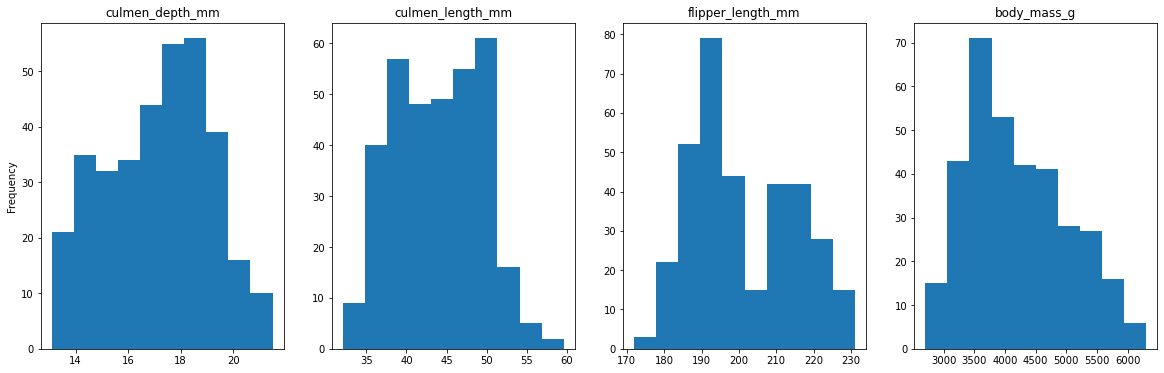

In [14]:
#Shows us frequency distribution.
fig,axs = plt.subplots(1,4,figsize=(20,6))
axs[0].hist(penguins_size.culmen_depth_mm)
axs[0].set_title('culmen_depth_mm')
axs[0].set_ylabel('Frequency')
axs[1].hist(penguins_size.culmen_length_mm)
axs[1].set_title('culmen_length_mm')
axs[2].hist(penguins_size.flipper_length_mm)
axs[2].set_title('flipper_length_mm')
axs[3].hist(penguins_size.body_mass_g)
axs[3].set_title('body_mass_g')
plt.show()

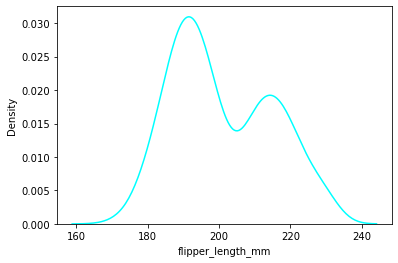

In [15]:
#Used for visualizing the probability density of a continuous var.
sns.kdeplot(penguins_size.flipper_length_mm,color='Cyan')
plt.show()

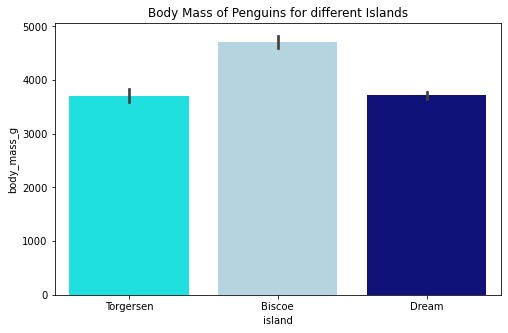

In [16]:
plt.figure(figsize=(8,5))
colors = ["cyan","lightblue", "darkblue"]
sns.barplot(x =penguins_size['island'],
y = penguins_size['body_mass_g'], palette = colors)
plt.title('Body Mass of Penguins for different Islands')
plt.show()

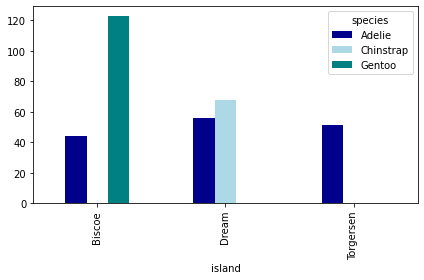

In [17]:
pd.crosstab(penguins_size['island'], penguins_size['species']).plot.bar(color=('DarkBlue', 'LightBlue', 'Teal'))
plt.tight_layout()

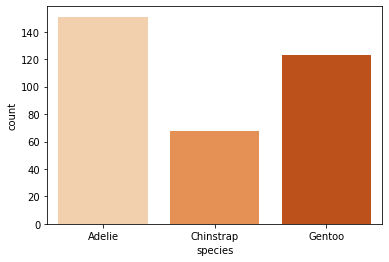

In [18]:
sns.countplot('species',data=penguins_size, palette = "Oranges")
plt.show()

Text(0.5, 1.0, 'Violin plot')

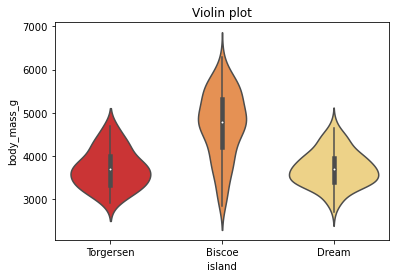

In [19]:
sns.violinplot(x = 'island',y = 'body_mass_g',data = penguins_size, palette="YlOrRd_r")
plt.title('Violin plot')

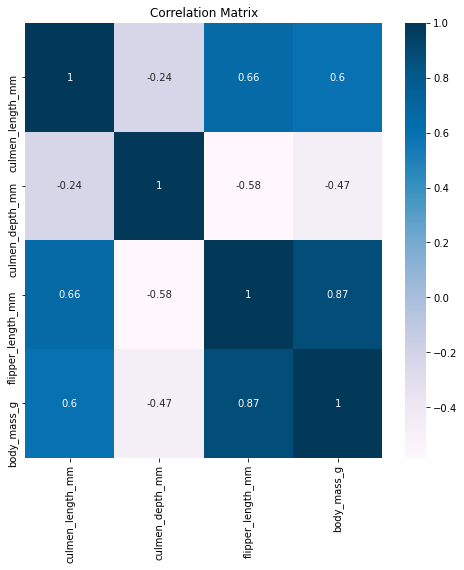

In [20]:
corr = penguins_size.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot = True, cmap = "PuBu")
plt.title('Correlation Matrix')
plt.show()

<AxesSubplot:>

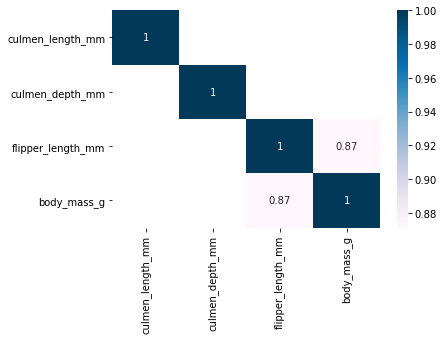

In [21]:
sns.heatmap(corr[(corr > 0.8)],annot = True, cmap="PuBu")